# _San Francisco Airport - Clustering_

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/d/de/San_Francisco_International_Airport_-_aerial_photo.jpg/1200px-San_Francisco_International_Airport_-_aerial_photo.jpg' width=600>

_**Clustering,** benzer nesnelerin veya verilerin gruplar hâlinde toplanması demektir._ <br>
_Bu projede, havaalanı yolcu verilerini benzerliklerine göre gruplara ayıracağız._

### _İmport_

In [1]:
import pandas as pd
# Veri analizi ve tablo işlemleri için kullanılır.

import warnings
warnings.filterwarnings('ignore')
# Çalışma sırasında çıkan uyarı mesajlarını gizler.

import matplotlib.pyplot as plt
# Matplotlib kütüphanesini import ediyoruz
# Grafik çizimleri ve görselleştirme için kullanacağız

import seaborn as sns
# Grafik ve görselleştirme işlemleri için kullanılır.

In [2]:
# KMeans algoritmasını import ediyoruz
from sklearn.cluster import KMeans

# Silhouette score hesaplamak için gerekli (kümeleme başarısını ölçmek için)
from sklearn.metrics import silhouette_score

# Sayısal hesaplamalar ve array işlemleri için NumPy
import numpy as np

# Elbow Method görselleştirmesi için Yellowbrick kütüphanesi
from yellowbrick.cluster import KElbowVisualizer

### _Eda_

In [3]:
df = pd.read_csv('air-traffic-passenger-statistics.csv')
# 'air-traffic-passenger-statistics.csv' adlı csv dosyasını okur ve veriyi DataFrame olarak 'df' değişkenine yükler.

In [4]:
df.sample()
# Veri setinden rastgele bir satır getirir, genel yapıyı hızlıca görmek için kullanılır.

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
16544,201703,Etihad Airways,EY,Etihad Airways,EY,International,Middle East,Deplaned,Other,International,A,2832


In [5]:
df.isnull().sum()

Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    63
Published Airline               0
Published Airline IATA Code    63
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              18885 non-null  int64 
 1   Operating Airline            18885 non-null  object
 2   Operating Airline IATA Code  18822 non-null  object
 3   Published Airline            18885 non-null  object
 4   Published Airline IATA Code  18822 non-null  object
 5   GEO Summary                  18885 non-null  object
 6   GEO Region                   18885 non-null  object
 7   Activity Type Code           18885 non-null  object
 8   Price Category Code          18885 non-null  object
 9   Terminal                     18885 non-null  object
 10  Boarding Area                18885 non-null  object
 11  Passenger Count              18885 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 1.7+ MB


In [7]:
df.shape

(18885, 12)

In [8]:
# df['Activity Period'] = 202501 gibi sayılar içeriyor

# Sayısal sütunu stringe çevir
df['Activity Period'] = df['Activity Period'].astype(str)

# İlk 4 karakteri alarak yılı oluştur
df['Year'] = df['Activity Period'].str[:4]

In [9]:
df=df[["Operating Airline","GEO Summary","GEO Region", "Activity Type Code", "Price Category Code", "Passenger Count", "Year"]]

In [10]:
df.isnull().sum()

Operating Airline      0
GEO Summary            0
GEO Region             0
Activity Type Code     0
Price Category Code    0
Passenger Count        0
Year                   0
dtype: int64

In [11]:
df2=pd.get_dummies(df,drop_first=True)

### _Clustering_

In [12]:
x = df2

In [13]:
# KMeans modeli 
model = KMeans(random_state=42)

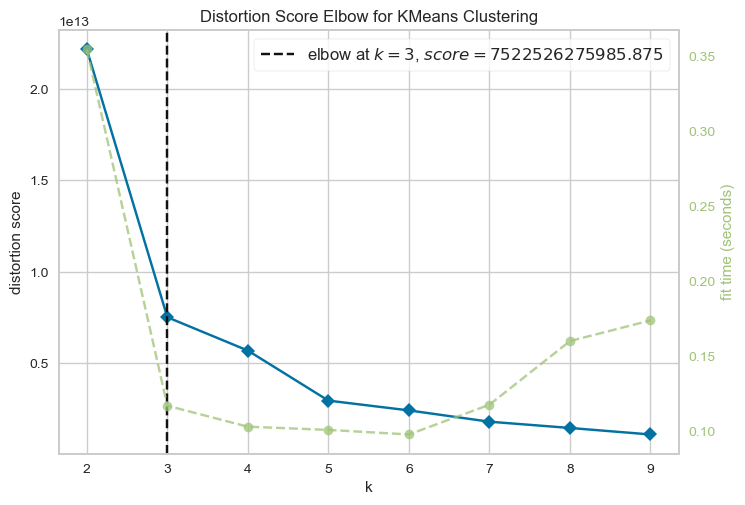

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
# Elbow Method görselleştirme 
visualizer = KElbowVisualizer(model, k=(2,10)) 
visualizer.fit(x) 
visualizer.show()

In [15]:
model = KMeans(4)
# 4 kümeli bir KMeans modeli oluşturur.

In [16]:
model = model.fit(x)
# Modeli verilerle eğitir (küme merkezlerini hesaplar).

In [17]:
tahmin = model.predict(x)
# Her gözlemin hangi kümeye ait olduğunu tahmin eder.

In [18]:
x['cluster'] = tahmin
# Tahmin edilen küme etiketlerini 'cluster' adlı yeni bir sütun olarak ekler.

In [19]:
x.head()
# İlk 5 satırı görüntüler, kümelenmiş verinin yapısını görmek için kullanılır.

,Passenger Count,Operating Airline_ATA Airlines,Operating Airline_Aer Lingus,Operating Airline_Aeromexico,Operating Airline_Air Berlin,Operating Airline_Air Canada,Operating Airline_Air Canada Jazz,Operating Airline_Air China,Operating Airline_Air France,Operating Airline_Air India Limited,...,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,cluster
0,27271,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
1,29131,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
2,5415,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
3,35156,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,3
4,34090,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0


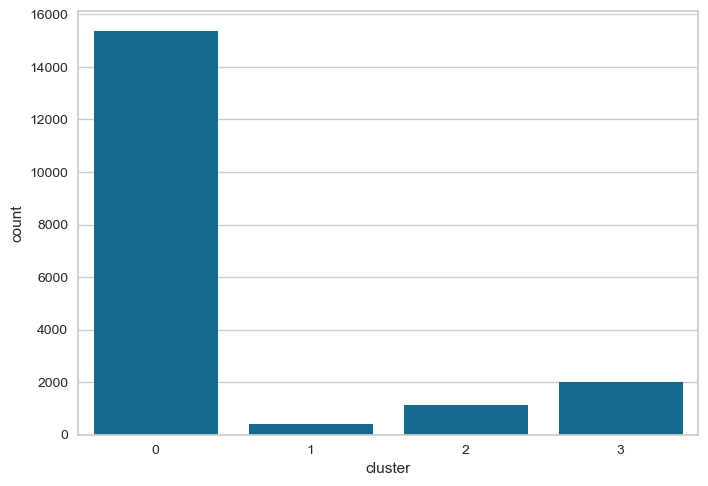

In [20]:
sns.countplot(x=x['cluster']);
# Her kümede kaç örnek (veri noktası) olduğunu çubuk grafikte gösterir.

In [21]:
silhouette_score(x, tahmin)
# Kümeleme kalitesini ölçen Silhouette skorunu hesaplar.
# Skor 1’e yaklaştıkça kümeler daha belirgin ve başarılıdır.

np.float64(0.7861526309403514)

### _Veri Görselleştirme_

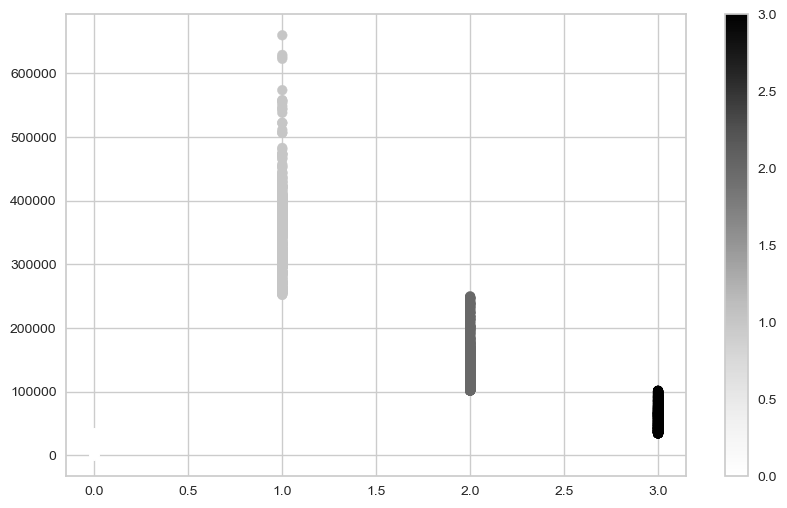

In [22]:
plt.figure(figsize=(10,6))
# Grafik boyutunu 10x6 inç olarak ayarlar.

plt.scatter(x['cluster'], x['Passenger Count'], c=tahmin)
# cluster (x ekseni) ve Passenger Count (y ekseni) değerlerine göre noktaları çizer.
# 'c=tahmin' parametresi, her noktanın rengini ait olduğu kümeye göre belirler.

plt.colorbar();
# Grafik yanına renk skalası ekler, böylece hangi renk hangi kümeyi temsil ediyor görülebilir.

In [23]:
# wcss = within cluster sum of squares (küme içi kareler toplamı)
wcss = []  # Her küme sayısı için WCSS değerlerini saklayacak liste
ss = []    # Her küme sayısı için Silhouette skorlarını saklayacak liste

for i in range(2, 10):
    model = KMeans(i)
    # i sayıda küme olacak şekilde KMeans modelini oluşturur.

    model = model.fit(x)
    # Modeli verilerle eğitir (küme merkezlerini hesaplar).

    tahmin = model.predict(x)
    # Her gözlemin hangi kümeye ait olduğunu tahmin eder.

    ssl = silhouette_score(x, tahmin)
    # Kümeleme kalitesini ölçen Silhouette skorunu hesaplar.

    ss.append(ssl)
    # Hesaplanan Silhouette skorunu listeye ekler.

    print(ssl)
    # Her iterasyonda Silhouette skorunu ekrana yazdırır.

    wcss.append(model.inertia_)
    # KMeans modelinin küme içi hata kareleri toplamını (inertia_) listeye ekler.

0.8596461920439561
0.8285981274933807
0.7863340647286231
0.6893993059984852
0.6613143573707643
0.656488009243394
0.6496303759453084
0.6405341268049121


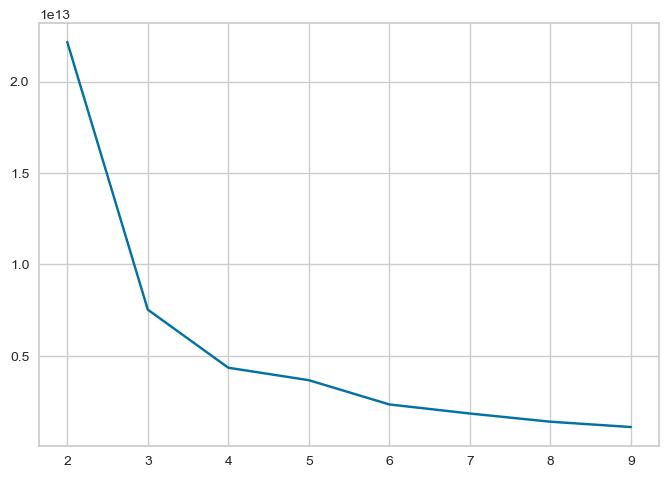

In [24]:
plt.plot(range(2,10), wcss);
# 2'den 9'a kadar olan küme sayıları için WCSS değerlerini çizer.
# Grafikteki “dirsek” (elbow) noktasının kırıldığı yer,
# en uygun küme sayısını (optimum cluster sayısı) gösterir.

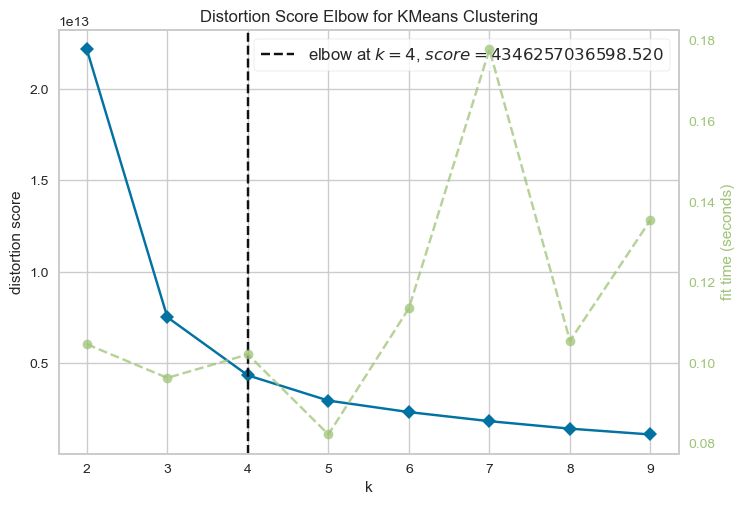

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
vis = KElbowVisualizer(KMeans(), k=(2,10))
# 2 ile 10 arasındaki küme sayıları için KMeans modelini değerlendirir.
# En uygun küme sayısını (elbow noktasını) otomatik olarak bulmak için görselleştirici oluşturur.

vis.fit(x)
# Veriyi modele uygular ve her küme sayısı için WCSS değerlerini hesaplar.

vis.show()
# Elbow (dirsek) grafiğini ekranda gösterir.

_Bu projede hava yolu yolcu verilerini kullanarak sayısal ve kategorik verileri işledik, KMeans ile kümelendik ve Elbow Method ile optimum küme sayısını görselleştirdik._